In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(train_data,train_labels),(test_data,test_labels)= tf.keras.datasets.imdb.load_data(num_words=1000)

In [3]:
def one_hot_sequences(sequences, dimension = 1000):
  results = np.zeros((len(sequences),dimension))
  for i, word_index in enumerate(sequences):
    results[i,word_index] = 1
  return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

In [7]:
#함수형 사용하기 
from keras.layers import Input,Dense,Dropout
from keras.models import Model
inputs = Input(shape=(1000,))
x = Dense(16,activation = "relu")(inputs)
#x= Dropout(0.3)(x)
x = Dense(16,activation = "relu")(x)
prediction =Dense(1,activation = "sigmoid")(x)

model = Model(inputs = inputs, outputs = prediction)
model.compile(loss='binary_crossentropy',optimizer= 'adam',
              metrics=['accuracy'])




In [8]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    #callbacks=[early_stopping],
                    batch_size = 512,
                    validation_data = (test_data,test_labels),
                    verbose =2)



Epoch 1/20
49/49 - 1s - loss: 0.5457 - accuracy: 0.7406 - val_loss: 0.4123 - val_accuracy: 0.8298 - 1s/epoch - 24ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3597 - accuracy: 0.8496 - val_loss: 0.3415 - val_accuracy: 0.8558 - 250ms/epoch - 5ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3199 - accuracy: 0.8684 - val_loss: 0.3307 - val_accuracy: 0.8613 - 250ms/epoch - 5ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3075 - accuracy: 0.8733 - val_loss: 0.3385 - val_accuracy: 0.8544 - 250ms/epoch - 5ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3032 - accuracy: 0.8769 - val_loss: 0.3299 - val_accuracy: 0.8586 - 250ms/epoch - 5ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2981 - accuracy: 0.8762 - val_loss: 0.3302 - val_accuracy: 0.8596 - 248ms/epoch - 5ms/step
Epoch 7/20
49/49 - 0s - loss: 0.2945 - accuracy: 0.8796 - val_loss: 0.3302 - val_accuracy: 0.8583 - 250ms/epoch - 5ms/step
Epoch 8/20
49/49 - 0s - loss: 0.2899 - accuracy: 0.8809 - val_loss: 0.3322 - val_accuracy: 0.8583 - 265ms/epoch - 5ms/step
Epoch 9/20
49/49 -

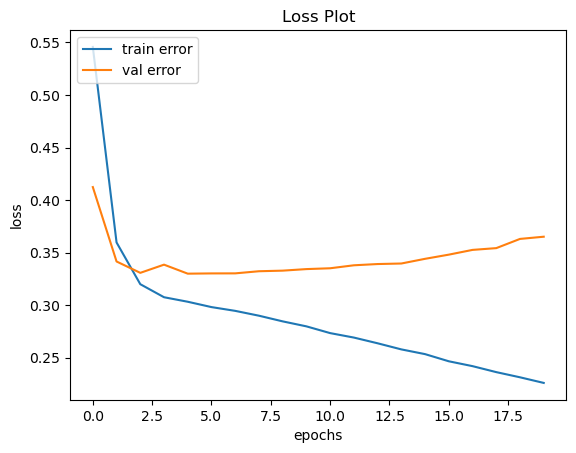

In [9]:
# dropout 사용 x 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1,len(acc)+1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error','val error'],loc ='upper left')
plt.show()

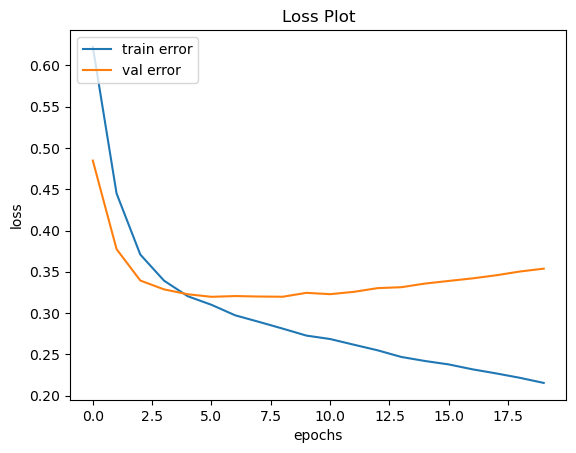

In [6]:
# dropout 사용 결과
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1,len(acc)+1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error','val error'],loc ='upper left')
plt.show()

In [ ]:
# 결론 
#dropout 사용하게되면 살짝 좋아진다. (최소 이 데이터에서는)
# earlystopping 하게되면 이 데이터는 2~4번정도 학습하고 학습이 중단된다. 